In [11]:
import numpy as np
import matplotlib.pyplot as plt

## Common pulse parameters

In [12]:
pulse_length = 1000  # pulse duration in us
shape_pts = 256  # number of points in the pulse shape
freq_offset = 0  # offset frequency in Hz
init_ph = 0      # initial phase in degrees

# Time resolution
time_res = pulse_length / (shape_pts)
# Actual time axis (to be used for plotting)
time = np.arange(0, pulse_length, time_res)
# Define apparent time, from -1 to +1
t_vec = np.linspace(-1, 1, shape_pts)

## Pulse shape specific parameters

In [13]:
lobes = 5 # number of lobes in the Sinc shape

## Generate the shaped pulse

In [14]:
# Define the shape
# the Sinc shape is defined by the number of zero-crossings,
# which is equal to number of lobes + 1
rf_waveform = np.sin(np.pi * (lobes + 1) * 0.5 * t_vec) / t_vec

# Normalize so that max val. is 1
rf_waveform = rf_waveform / np.amax(rf_waveform)

# The phase modulation part below is not necessary for this exercise,
# but is required to use the pulse on a device
phs_mod = np.zeros(shape_pts)
for idx in range(shape_pts):
    if rf_waveform[idx] < 0:
        phs_mod[idx] = 180
    else:
        phs_mod[idx] = 0

# Add initial phase offset
phs_mod = phs_mod + init_ph

## Plot the shape

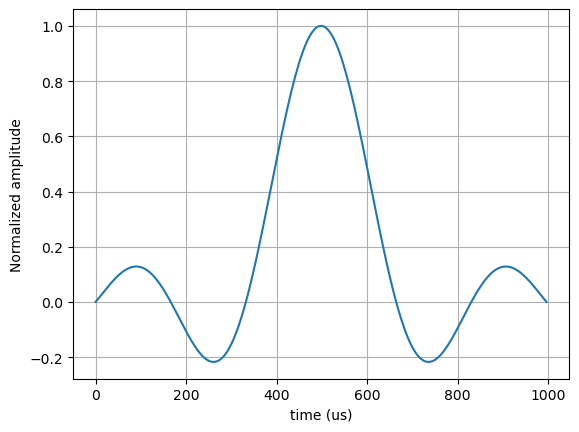

In [15]:
plt.plot(time, rf_waveform)
plt.xlabel("time (us)")
plt.ylabel("Normalized amplitude")
plt.grid()

## Reference Hard 90 Pulse
### to use for pulse integral calculation

In [16]:
reference_rf_waveform = np.linspace(1, 1, len(rf_waveform))
reference_90_dur = 10  # duration of calibrated 90 hard pulse, in microsecs
reference_90_amp = 0  # amplitude in dB

reference_90_khz = np.round((1 / (4 * reference_90_dur * 1e-3)), 4)

## Pulse integral calculation

In [19]:
pulse_integ = np.round((np.trapz(rf_waveform) / np.trapz(reference_rf_waveform)), 4)
print(f"The Pulse-integral for the shaped pulse is {pulse_integ}")

The Pulse-integral for the shaped pulse is 0.1777


## Calculate power in dB

In [18]:
# shaped RF amp in kHz, assuming a 90 deg. flip angle
rf_amp_khz = 90 / (360 * pulse_integ * pulse_length * 1e-3)

rf_amp_dB =  np.round((reference_90_amp + 20 * np.log10(rf_amp_khz / reference_90_khz)), 2)
print(f"The required power for the shaped pulse is {rf_amp_dB} dB")

The required power for the shaped pulse is -24.99 dB
